# projet dataset

## dataset sur les tendances youtubes de 2017 a 2018 en france

objectif trouver les périodes où c'est le plus intéréssant pour sortir une vidéo

In [13]:
import numpy as np
import pandas as pd
import sklearn as skn
import matplotlib.pyplot as plt

In [14]:
ytb = pd.read_csv("FRvideos.csv")

In [15]:
ytb.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
dtype: int64

In [16]:
ytb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [17]:
ytb.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [18]:
ytb['trending_date'] = ytb['trending_date'].str.replace('.','')

In [19]:
ytb['trending_date'].head()

0    171411
1    171411
2    171411
3    171411
4    171411
Name: trending_date, dtype: object

In [20]:
ytb['trending_date'] = pd.to_datetime(ytb['trending_date'],format='%y%d%m')

In [21]:
ytb['publish_time'] = pd.to_datetime(ytb['publish_time'])

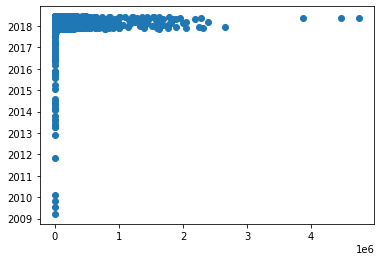

In [22]:
plt.scatter(ytb['likes'],ytb['publish_time'])

In [26]:
Y = ytb['trending_date']
X = ytb[['likes','views','comment_count']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
truc = LinearRegression()

In [30]:
truc.fit(X_train,y_train)

LinearRegression()

In [31]:
truc.coef_

array([-3.29869353e+09,  2.43097866e+08,  6.72170222e+09])

In [32]:
truc.intercept_

1.5196384874714964e+18

In [34]:
truc.predict(X_test)

array([1.51965703e+18, 1.51963989e+18, 1.51964026e+18, ...,
       1.51963889e+18, 1.51965328e+18, 1.51965393e+18])

In [35]:
truc.score(X_test,y_test)*100

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')